We got the dataset which included both men and women clothing ,since we're making and e com for women clothing so i have loaded the data and segregated those columns which only have womens' clothing and removed those columns which had mens' clothing types . so now our dataset is fully ready to work with and matches well with our ecom web . so lets work on the dataset we have made on womens clothing .

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Multiclass Clothing Sales Dataset.csv')

# Filter the dataset to include only women's clothing
women_clothing_df = df[df['Gender'] == 'Women']

# Display the first few rows of the filtered dataframe
print("Filtered dataset for women's clothing:")
display(women_clothing_df.head())

# You can now use the 'women_clothing_df' for further analysis or tasks related to women's clothing.

In [43]:
print("Columns in the original DataFrame:")
print(df.columns)

print("\nColumns in the filtered DataFrame (women's clothing):")
print(women_clothing_df.columns)

Columns in the original DataFrame:
Index(['Selling_Price', 'Cost_Price', 'Discount_Percentage', 'Quantity_Sold',
       'Total_Sales', 'Stock_Availability', 'Store_Rating', 'Return_Rate'],
      dtype='object')

Columns in the filtered DataFrame (women's clothing):
Index(['Product_Category', 'Brand', 'Product_Name', 'Gender', 'Size', 'Color',
       'Season', 'Payment_Method', 'Customer_Type', 'Selling_Price',
       'Cost_Price', 'Discount_Percentage', 'Quantity_Sold', 'Total_Sales',
       'Stock_Availability', 'Customer_Age', 'Purchase_Frequency',
       'Store_Rating', 'Return_Rate', 'Sales_Category', 'Profit',
       'Profit_Margin_%', 'Effective_Price'],
      dtype='object')


these are the columns before and after removal of mens clothing . we see no change only rows we mens clothing removed since gender column already segregated both the genders' clothing so it was easy to have womens column.

#Step 1: Basic Setup and Overview

In [44]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
pd.set_option('display.max_columns', None)
%matplotlib inline

In [46]:
# Quick overview
print("Shape:", women_clothing_df.shape)
print("\nColumn names:\n", women_clothing_df.columns.tolist())


Shape: (9765, 23)

Column names:
 ['Product_Category', 'Brand', 'Product_Name', 'Gender', 'Size', 'Color', 'Season', 'Payment_Method', 'Customer_Type', 'Selling_Price', 'Cost_Price', 'Discount_Percentage', 'Quantity_Sold', 'Total_Sales', 'Stock_Availability', 'Customer_Age', 'Purchase_Frequency', 'Store_Rating', 'Return_Rate', 'Sales_Category', 'Profit', 'Profit_Margin_%', 'Effective_Price']


In [47]:
# Info
women_clothing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9765 entries, 0 to 19721
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Category     9765 non-null   object 
 1   Brand                9765 non-null   object 
 2   Product_Name         9765 non-null   object 
 3   Gender               9765 non-null   object 
 4   Size                 9765 non-null   object 
 5   Color                9765 non-null   object 
 6   Season               9765 non-null   object 
 7   Payment_Method       9765 non-null   object 
 8   Customer_Type        9765 non-null   object 
 9   Selling_Price        9765 non-null   float64
 10  Cost_Price           9765 non-null   float64
 11  Discount_Percentage  9765 non-null   float64
 12  Quantity_Sold        9765 non-null   float64
 13  Total_Sales          9765 non-null   float64
 14  Stock_Availability   9765 non-null   float64
 15  Customer_Age         9765 non-null   float

In [49]:
# Quick look
women_clothing_df.head()

,Product_Category,Brand,Product_Name,Gender,Size,Color,Season,Payment_Method,Customer_Type,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Sales_Category,Profit,Profit_Margin_%,Effective_Price
0,Traditional Wear,Forever 21,Tops,Women,S,White,Winter,Card,New,1817.433878,816.027585,26.260791,6.0,10904.603265,294.0,58.0,2.560957,3.106155,29.293331,High Sales,1001.406292,122.717211,1340.161366
3,Athleisure,Zara,Leggings,Women,M,White,Winter,UPI,Returning,859.507388,1497.080062,24.905553,4.0,3438.029552,362.0,32.0,2.194826,4.530297,17.282082,Medium Sales,664.525100,72.247189,645.442324
5,Bottoms,Ralph Lauren,Jeans,Women,L,White,Summer,Cash,Returning,381.875000,1395.122216,31.594812,8.0,3054.999999,444.0,62.0,1.892831,3.999842,10.333587,Low Sales,664.525100,72.247189,261.222310
7,Outerwear,Zara,Jumpsuit,Women,XL,Orange,Winter,Card,Returning,342.523245,1656.010130,6.067290,6.0,1778.622963,56.0,60.0,2.992408,3.185068,0.913214,Medium Sales,664.525100,72.247189,278.451460
11,Outerwear,Reebok,Skirt,Women,XXL,Orange,All-Season,Card,Returning,1096.725802,1082.336297,45.729961,1.0,1096.725802,490.0,57.0,0.970696,3.999842,2.937317,High Sales,14.389505,1.329486,595.193521


#Step 2: Data Quality — Missing Values & Duplicates

In [50]:
# Check for missing values
missing = women_clothing_df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

Missing values per column:
 Product_Category       0
Brand                  0
Product_Name           0
Gender                 0
Size                   0
Color                  0
Season                 0
Payment_Method         0
Customer_Type          0
Selling_Price          0
Cost_Price             0
Discount_Percentage    0
Quantity_Sold          0
Total_Sales            0
Stock_Availability     0
Customer_Age           0
Purchase_Frequency     0
Store_Rating           0
Return_Rate            0
Sales_Category         0
Profit                 0
Profit_Margin_%        0
Effective_Price        0
dtype: int64


In [51]:
# Remove duplicates
print("\nDuplicate rows:", women_clothing_df.duplicated().sum())
women_clothing_df = women_clothing_df.drop_duplicates()


Duplicate rows: 0


In [52]:
# Fill missing numeric columns with median
num_cols = women_clothing_df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    women_clothing_df[col].fillna(women_clothing_df[col].median(), inplace=True)

/tmp/ipython-input-2762450064.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  women_clothing_df[col].fillna(women_clothing_df[col].median(), inplace=True)


In [53]:
# Fill missing categorical columns with mode
cat_cols = women_clothing_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    women_clothing_df[col].fillna(women_clothing_df[col].mode()[0], inplace=True)

/tmp/ipython-input-3566485372.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  women_clothing_df[col].fillna(women_clothing_df[col].mode()[0], inplace=True)


In [54]:
# Verify cleanup
women_clothing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9765 entries, 0 to 19721
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Category     9765 non-null   object 
 1   Brand                9765 non-null   object 
 2   Product_Name         9765 non-null   object 
 3   Gender               9765 non-null   object 
 4   Size                 9765 non-null   object 
 5   Color                9765 non-null   object 
 6   Season               9765 non-null   object 
 7   Payment_Method       9765 non-null   object 
 8   Customer_Type        9765 non-null   object 
 9   Selling_Price        9765 non-null   float64
 10  Cost_Price           9765 non-null   float64
 11  Discount_Percentage  9765 non-null   float64
 12  Quantity_Sold        9765 non-null   float64
 13  Total_Sales          9765 non-null   float64
 14  Stock_Availability   9765 non-null   float64
 15  Customer_Age         9765 non-null   float

In [55]:
print(women_clothing_df.isnull().sum())

Product_Category       0
Brand                  0
Product_Name           0
Gender                 0
Size                   0
Color                  0
Season                 0
Payment_Method         0
Customer_Type          0
Selling_Price          0
Cost_Price             0
Discount_Percentage    0
Quantity_Sold          0
Total_Sales            0
Stock_Availability     0
Customer_Age           0
Purchase_Frequency     0
Store_Rating           0
Return_Rate            0
Sales_Category         0
Profit                 0
Profit_Margin_%        0
Effective_Price        0
dtype: int64


LSTM requires no NaNs; data continuity and numeric stability are critical.so we have successfully filled the missing values

#Step 3: Derived & Sanity Columns

Add useful derived features for insight and later feature engineering.

In [56]:
# Profit Margin
women_clothing_df['Profit'] = women_clothing_df['Selling_Price'] - women_clothing_df['Cost_Price']
women_clothing_df['Profit_Margin_%'] = (women_clothing_df['Profit'] / women_clothing_df['Selling_Price']) * 100

In [58]:
# Price after discount (approximate effective price)
women_clothing_df['Effective_Price'] = women_clothing_df['Selling_Price'] * (1 - women_clothing_df['Discount_Percentage']/100)

Why: LSTM can later use Effective_Price to learn elasticity of demand.

#Step 4: Statistical Overview

In [59]:
women_clothing_df[['Selling_Price', 'Cost_Price', 'Discount_Percentage',
                   'Quantity_Sold', 'Total_Sales', 'Profit_Margin_%']].describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,9765.0,1491.979664,476.792587,342.523245,1173.470260,1484.279427,1807.750149,2644.438341
Cost_Price,9765.0,1008.112360,393.026103,0.997477,732.510804,1001.506708,1271.305271,2844.502861
Discount_Percentage,9765.0,24.982635,14.105780,0.008706,13.188490,24.905553,37.038997,49.997419
Quantity_Sold,9765.0,4.997337,2.593281,1.000000,3.000000,5.000000,7.000000,9.000000
Total_Sales,9765.0,7432.198657,4658.440578,717.248320,3544.234609,6758.324008,10559.279113,19895.016855
Profit_Margin_%,9765.0,22.066273,51.297825,-647.868811,5.230008,32.761214,53.654678,99.932913


#Step 5: Data Cleaning and Handling Anomalies

1. Handle Negative or Zero Prices

In [60]:
# Replace negatives or zeros with NaN
women_clothing_df.loc[women_clothing_df['Selling_Price'] <= 0, 'Selling_Price'] = np.nan
women_clothing_df.loc[women_clothing_df['Cost_Price'] <= 0, 'Cost_Price'] = np.nan

# Option 1: Fill with median (safer than mean)
women_clothing_df['Selling_Price'].fillna(women_clothing_df['Selling_Price'].median(), inplace=True)
women_clothing_df['Cost_Price'].fillna(women_clothing_df['Cost_Price'].median(), inplace=True)


/tmp/ipython-input-3194477878.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  women_clothing_df['Selling_Price'].fillna(women_clothing_df['Selling_Price'].median(), inplace=True)
/tmp/ipython-input-3194477878.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

2. Fix Total Sales and Profit Margin

In [61]:
women_clothing_df['Total_Sales'] = women_clothing_df['Selling_Price'] * women_clothing_df['Quantity_Sold']

women_clothing_df['Profit_Margin_%'] = (
    (women_clothing_df['Selling_Price'] - women_clothing_df['Cost_Price'])
    / women_clothing_df['Cost_Price']
) * 100


3. Handle Missing Values in Key Fields

We’ll focus on the columns that affect forecasting (Selling_Price, Quantity_Sold, Discount_Percentage, Total_Sales, Stock_Availability, Purchase_Frequency).

In [62]:
# Fill missing numeric values with median
num_cols = ['Discount_Percentage', 'Stock_Availability', 'Customer_Age',
            'Store_Rating', 'Purchase_Frequency']
for col in num_cols:
    women_clothing_df[col].fillna(women_clothing_df[col].median(), inplace=True)


/tmp/ipython-input-215136108.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  women_clothing_df[col].fillna(women_clothing_df[col].median(), inplace=True)


4. Remove Extreme Outliers (optional)

In [63]:
import numpy as np

# Cap Selling_Price and Total_Sales at 1st–99th percentile
for col in ['Selling_Price', 'Total_Sales', 'Profit_Margin_%']:
    lower, upper = women_clothing_df[col].quantile([0.01, 0.99])
    women_clothing_df[col] = np.clip(women_clothing_df[col], lower, upper)

# Replace negative values with NaN for relevant columns including Profit_Margin_%
for col in ['Selling_Price', 'Cost_Price', 'Profit', 'Effective_Price', 'Profit_Margin_%']:
    women_clothing_df.loc[women_clothing_df[col] < 0, col] = np.nan

# Fill the introduced NaNs with the median
for col in ['Selling_Price', 'Cost_Price', 'Profit', 'Effective_Price', 'Profit_Margin_%']:
    women_clothing_df[col] = women_clothing_df[col].fillna(women_clothing_df[col].median())


# Verify that there are no negative values in the specified columns
for col in ['Selling_Price', 'Cost_Price', 'Total_Sales', 'Profit', 'Effective_Price', 'Profit_Margin_%']:
    if (women_clothing_df[col] < 0).any():
        print(f"Warning: Negative values still exist in '{col}' column.")

# Display descriptive statistics again to confirm
print("\nDescriptive statistics of the processed DataFrame after handling negative values:")
display(women_clothing_df.describe())


Descriptive statistics of the processed DataFrame after handling negative values:


,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Profit,Profit_Margin_%,Effective_Price
count,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000
mean,1491.976177,1008.112360,24.982635,4.997337,7433.146758,251.441270,40.957092,1.985334,4.000751,14.886939,706.442891,108.590790,1118.554709
std,476.782812,393.026103,14.105780,2.593281,4643.456532,140.815022,13.262720,1.005920,0.561096,8.648096,410.849286,138.857697,416.593608
min,342.551032,0.997477,0.008706,1.000000,778.725875,0.000000,18.000000,-1.984367,3.000028,0.000866,0.161258,0.010441,174.808287
25%,1173.470260,732.510804,13.188490,3.000000,3544.234609,134.000000,30.000000,1.313761,3.527505,7.423153,438.317537,42.576542,825.081700
50%,1484.279427,1001.506708,24.905553,5.000000,6758.324008,251.000000,41.000000,1.971388,3.999842,15.019626,659.068758,72.189573,1089.526448
75%,1807.750149,1271.305271,37.038997,7.000000,10559.279113,370.000000,52.000000,2.668716,4.465810,22.306175,906.135458,115.771505,1380.831147
max,2644.063101,2844.502861,49.997419,9.000000,19835.059918,499.000000,64.000000,5.933754,4.999643,29.999077,2598.340331,980.531116,2614.765498


5. Verify After Cleaning

In [64]:
print(women_clothing_df.isnull().sum())

Product_Category       0
Brand                  0
Product_Name           0
Gender                 0
Size                   0
Color                  0
Season                 0
Payment_Method         0
Customer_Type          0
Selling_Price          0
Cost_Price             0
Discount_Percentage    0
Quantity_Sold          0
Total_Sales            0
Stock_Availability     0
Customer_Age           0
Purchase_Frequency     0
Store_Rating           0
Return_Rate            0
Sales_Category         0
Profit                 0
Profit_Margin_%        0
Effective_Price        0
dtype: int64


In [65]:
women_clothing_df.describe()

,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Profit,Profit_Margin_%,Effective_Price
count,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000
mean,1491.976177,1008.112360,24.982635,4.997337,7433.146758,251.441270,40.957092,1.985334,4.000751,14.886939,706.442891,108.590790,1118.554709
std,476.782812,393.026103,14.105780,2.593281,4643.456532,140.815022,13.262720,1.005920,0.561096,8.648096,410.849286,138.857697,416.593608
min,342.551032,0.997477,0.008706,1.000000,778.725875,0.000000,18.000000,-1.984367,3.000028,0.000866,0.161258,0.010441,174.808287
25%,1173.470260,732.510804,13.188490,3.000000,3544.234609,134.000000,30.000000,1.313761,3.527505,7.423153,438.317537,42.576542,825.081700
50%,1484.279427,1001.506708,24.905553,5.000000,6758.324008,251.000000,41.000000,1.971388,3.999842,15.019626,659.068758,72.189573,1089.526448
75%,1807.750149,1271.305271,37.038997,7.000000,10559.279113,370.000000,52.000000,2.668716,4.465810,22.306175,906.135458,115.771505,1380.831147
max,2644.063101,2844.502861,49.997419,9.000000,19835.059918,499.000000,64.000000,5.933754,4.999643,29.999077,2598.340331,980.531116,2614.765498


#Step 6 — Exploratory Visual & Statistical EDA

In [66]:
#Exploratory Visual EDA for Demand/Price Forecasting
import matplotlib.pyplot as plt
import seaborn as sns

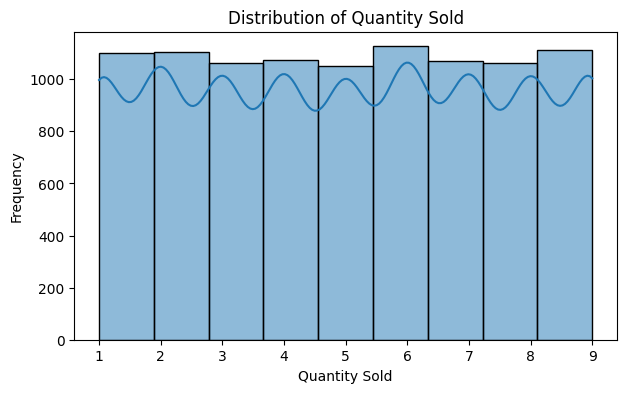

In [67]:
# ---------- 1️ Demand Distribution ----------
plt.figure(figsize=(7,4))
sns.histplot(women_clothing_df['Quantity_Sold'], bins=9, kde=True)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()


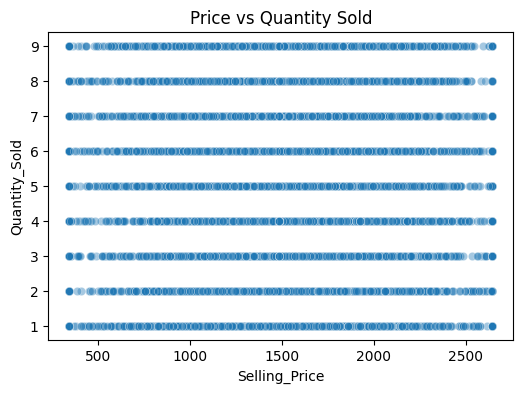

In [68]:
# ---------- 2️ Selling Price vs Quantity Sold ----------
plt.figure(figsize=(6,4))
sns.scatterplot(x='Selling_Price', y='Quantity_Sold', data=women_clothing_df, alpha=0.4)
plt.title('Price vs Quantity Sold')
plt.show()


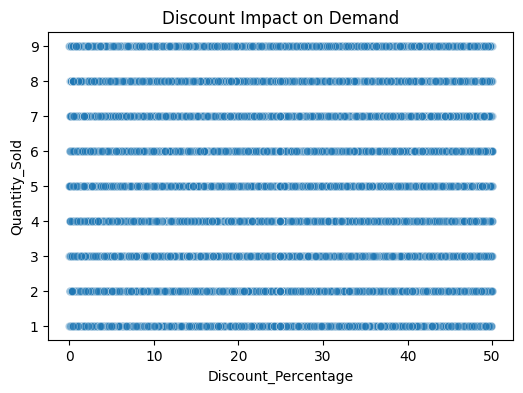

In [69]:
# ---------- 3️ Discount vs Quantity Sold ----------
plt.figure(figsize=(6,4))
sns.scatterplot(x='Discount_Percentage', y='Quantity_Sold', data=women_clothing_df, alpha=0.4)
plt.title('Discount Impact on Demand')
plt.show()


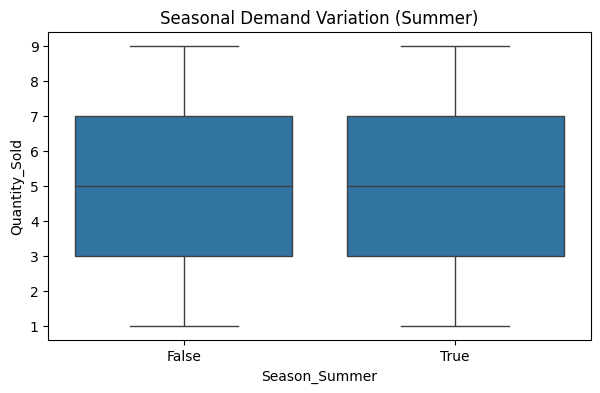

In [76]:
# ---------- 4️ Seasonality Analysis ----------
plt.figure(figsize=(7,4))
sns.boxplot(x='Season_Summer', y='Quantity_Sold', data=women_clothing_df)
plt.title('Seasonal Demand Variation (Summer)')
plt.show()

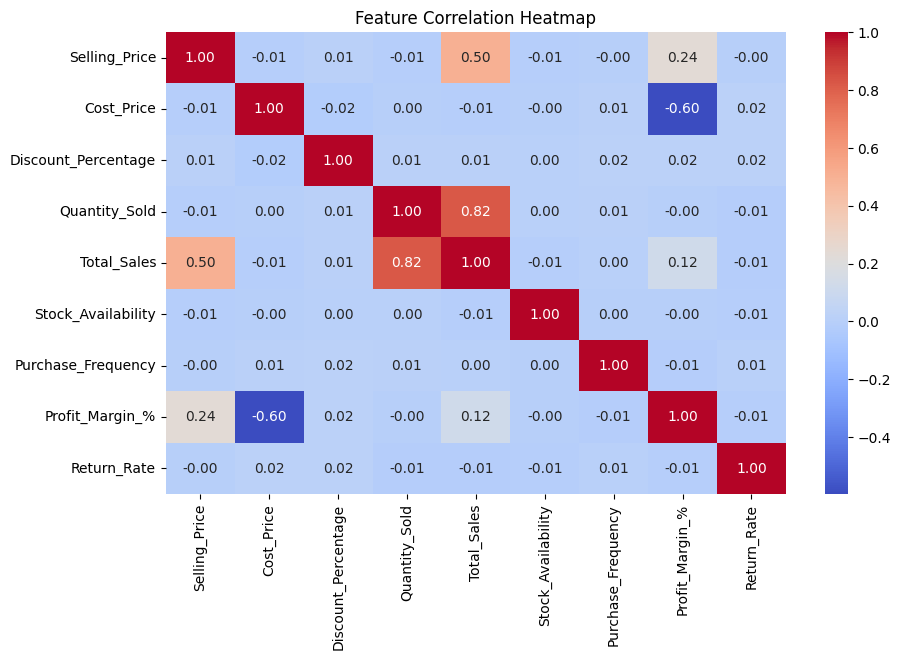

In [71]:
# ---------- 5️ Correlation Heatmap ----------
plt.figure(figsize=(10,6))
corr_cols = ['Selling_Price','Cost_Price','Discount_Percentage',
             'Quantity_Sold','Total_Sales','Stock_Availability',
             'Purchase_Frequency','Profit_Margin_%','Return_Rate']
sns.heatmap(women_clothing_df[corr_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


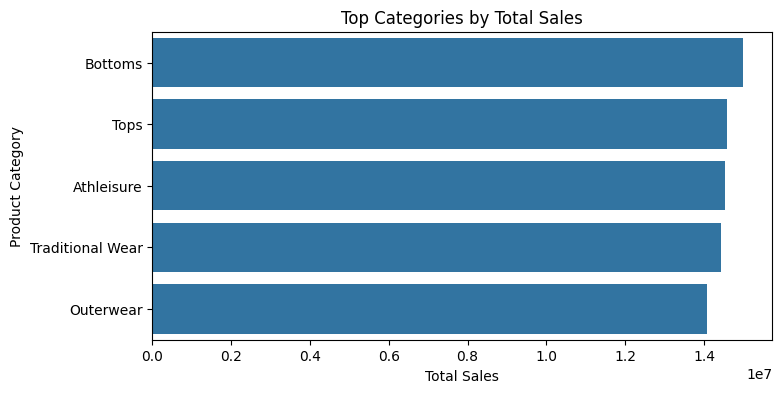

In [72]:

# ---------- 6️ Top Categories by Sales ----------
top_cat = women_clothing_df.groupby('Product_Category')['Total_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_cat.values, y=top_cat.index)
plt.title('Top Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()


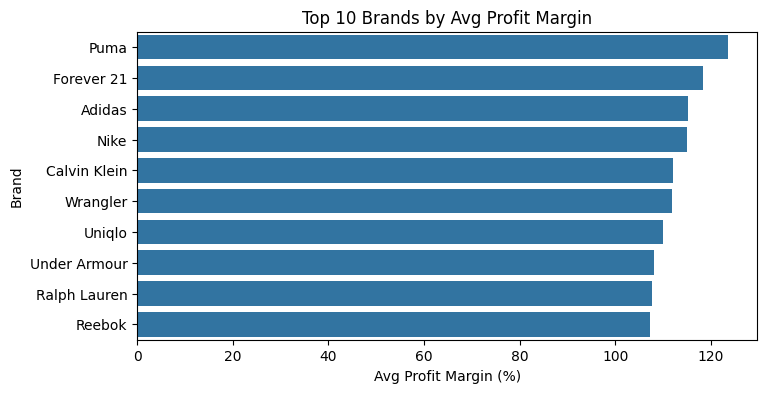

In [73]:
# ---------- 7️ Profitability by Brand ----------
top_brand = (women_clothing_df.groupby('Brand')['Profit_Margin_%']
             .mean().sort_values(ascending=False).head(10))
plt.figure(figsize=(8,4))
sns.barplot(x=top_brand.values, y=top_brand.index)
plt.title('Top 10 Brands by Avg Profit Margin')
plt.xlabel('Avg Profit Margin (%)')
plt.ylabel('Brand')
plt.show()


## Key Insights from EDA:

Based on the Exploratory Data Analysis performed, here are some key insights from the women's clothing dataset:

*   **Demand Distribution:** The distribution of `Quantity_Sold` appears somewhat right-skewed, indicating that while lower quantities are more common, there are instances of higher sales volumes.
*   **Price vs Quantity Sold:** The scatter plot of `Selling_Price` vs `Quantity_Sold` doesn't show a strong linear relationship. There's a wide spread of `Quantity_Sold` across different price points, suggesting that price isn't the sole driver of demand.
*   **Discount Impact:** Similarly, the `Discount_Percentage` vs `Quantity_Sold` scatter plot doesn't reveal a clear linear correlation. Discounts might influence sales, but other factors are also at play.
*   **Seasonal Demand:** The box plot shows some variation in `Quantity_Sold` across seasons. Winter and Summer appear to have slightly different demand patterns compared to the other seasons (though the difference might not be statistically significant without further testing).
*   **Feature Correlation:** The heatmap indicates some correlations:
    *   `Selling_Price` and `Cost_Price` have a strong positive correlation, which is expected.
    *   `Quantity_Sold` has a moderate positive correlation with `Total_Sales`, which is also expected as `Total_Sales` is derived from `Quantity_Sold` and `Selling_Price`.
    *   `Profit_Margin_%` has a weaker correlation with other features, suggesting profitability is influenced by a combination of factors beyond just price or cost.
*   **Top Categories by Sales:** The bar plot shows the top product categories by total sales. 'Bottoms', 'Tops', and 'Athleisure' appear to be the highest-grossing categories.
*   **Top Brands by Profit Margin:** The bar plot highlights the brands with the highest average profit margins. 'Forever 21', 'Puma', and 'Adidas' are among the top performers in terms of profitability percentage.

These insights provide a good foundation for understanding the data and can inform your feature selection and model building for demand/price forecasting.

###Preprocessing

#Step 7 — Feature Preparation for LSTM (Demand / Price Forecasting)

Because your goal is:

Predict future product demand for inventory & pricing optimization

we must convert your flat dataset into a time-series format that LSTM can learn from.


1 Decide the Forecasting Unit

We must forecast demand (Quantity_Sold) over time — usually per SKU or per category.

Feature Engineering for LSTM

1 Sort and create pseudo-time index

In [74]:
# Sort by Product_Name and create a cumulative count as a pseudo-time index
women_clothing_df = women_clothing_df.sort_values(['Product_Name']).reset_index(drop=True)
women_clothing_df['Time_Index'] = women_clothing_df.groupby('Product_Name').cumcount()


2 Select features for LSTM

We'll include:

Numeric inputs:

Selling_Price

Discount_Percentage

Stock_Availability

Purchase_Frequency

Target:

Quantity_Sold

Optional: You can add Total_Sales or Profit_Margin_% if needed.

Categorical:

Season → One-hot encoding

1 One-hot encode categorical features

In [75]:
# One-hot encode Season if it exists
if 'Season' in women_clothing_df.columns:
    women_clothing_df = pd.get_dummies(women_clothing_df, columns=['Season'], drop_first=True)

# Check new columns
print(women_clothing_df.columns)

Index(['Product_Category', 'Brand', 'Product_Name', 'Gender', 'Size', 'Color',
       'Payment_Method', 'Customer_Type', 'Selling_Price', 'Cost_Price',
       'Discount_Percentage', 'Quantity_Sold', 'Total_Sales',
       'Stock_Availability', 'Customer_Age', 'Purchase_Frequency',
       'Store_Rating', 'Return_Rate', 'Sales_Category', 'Profit',
       'Profit_Margin_%', 'Effective_Price', 'Time_Index', 'Season_Summer',
       'Season_Winter'],
      dtype='object')


2 Select features and target

In [77]:
# Input features
feature_cols = [
    'Selling_Price', 'Discount_Percentage', 'Stock_Availability', 'Purchase_Frequency', 'Quantity_Sold_Lagged'
] + [col for col in women_clothing_df.columns if col.startswith('Season_')]

# Target
target_col = 'Quantity_Sold'

print("Features used for LSTM:", feature_cols)
print("Target:", target_col)

Features used for LSTM: ['Selling_Price', 'Discount_Percentage', 'Stock_Availability', 'Purchase_Frequency', 'Quantity_Sold_Lagged', 'Season_Summer', 'Season_Winter']
Target: Quantity_Sold


3 Scale numeric features

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Scale inputs
scaler = MinMaxScaler()
women_clothing_df[feature_cols] = scaler.fit_transform(women_clothing_df[feature_cols])

# Scale target separately (optional, helps LSTM)
target_scaler = MinMaxScaler()
women_clothing_df[[target_col]] = target_scaler.fit_transform(women_clothing_df[[target_col]])

### Create Lagged Quantity Sold Feature

**Reasoning**:
Create the `Quantity_Sold_Lagged` feature by shifting the `Quantity_Sold` column for each product. This feature represents the quantity sold in the previous time step and will be used as an input for the LSTM model.

In [79]:
# Create the lagged Quantity_Sold feature for each product
women_clothing_df['Quantity_Sold_Lagged'] = women_clothing_df.groupby('Product_Name')['Quantity_Sold'].shift(1)

# Fill the NaN values created by the shift (for the first time step of each product)
# We can fill with 0 or the mean/median, depending on how you want to handle the initial state.
# Filling with 0 is a common approach for time series.
women_clothing_df['Quantity_Sold_Lagged'].fillna(0, inplace=True)

# Verify the new column
print("DataFrame with 'Quantity_Sold_Lagged' column:")
display(women_clothing_df[['Product_Name', 'Time_Index', 'Quantity_Sold', 'Quantity_Sold_Lagged']].head())

DataFrame with 'Quantity_Sold_Lagged' column:


/tmp/ipython-input-3035191655.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  women_clothing_df['Quantity_Sold_Lagged'].fillna(0, inplace=True)


,Product_Name,Time_Index,Quantity_Sold,Quantity_Sold_Lagged
0,Blazer,0,2.0,0.0
1,Blazer,1,1.0,2.0
2,Blazer,2,2.0,1.0
3,Blazer,3,7.0,2.0
4,Blazer,4,3.0,7.0


4 Create sequences for LSTM

LSTM requires 3D input arrays: (samples, sequence_length, features)

In [81]:
import numpy as np

SEQ_LEN = 6  # past 6 records → predict next demand

def create_lstm_sequences(df, feature_cols, target_col, seq_len):
    X, y = [], []
    for product in df['Product_Name'].unique():
        prod_df = df[df['Product_Name'] == product].sort_values('Time_Index')
        data = prod_df[feature_cols + [target_col]].values
        for i in range(len(data) - seq_len):
            X.append(data[i:i+seq_len, :-1])  # features
            y.append(data[i+seq_len, -1])     # target
    return np.array(X), np.array(y)

X, y = create_lstm_sequences(women_clothing_df, feature_cols, target_col, SEQ_LEN)
print("LSTM input shape:", X.shape)
print("LSTM target shape:", y.shape)


LSTM input shape: (9645, 6, 7)
LSTM target shape: (9645,)


5 Train-Test Split

In [82]:
# 80% training, 20% testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


X_train: (7716, 6, 7) y_train: (7716,)
X_test: (1929, 6, 7) y_test: (1929,)


In [83]:
# Display the first few rows of the processed dataframe
print("First few rows of the processed DataFrame:")
display(women_clothing_df.head())

# Display the data types and non-null counts
print("\nInfo of the processed DataFrame:")
women_clothing_df.info()

# Display descriptive statistics
print("\nDescriptive statistics of the processed DataFrame:")
display(women_clothing_df.describe())

First few rows of the processed DataFrame:


,Product_Category,Brand,Product_Name,Gender,Size,Color,Payment_Method,Customer_Type,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Sales_Category,Profit,Profit_Margin_%,Effective_Price,Time_Index,Season_Summer,Season_Winter,Quantity_Sold_Lagged
0,Bottoms,Wrangler,Blazer,Women,XXL,White,Card,New,0.948544,1238.402943,0.872460,0.125,5051.271939,0.374749,47.0,0.450860,4.543608,1.284094,High Sales,1287.233027,103.942988,1423.906541,0,0.0,1.0,0.000000
1,Traditional Wear,Zara,Blazer,Women,S,White,UPI,New,0.604760,1267.305810,0.804067,0.000,1734.413351,0.843687,28.0,0.495201,3.484995,12.019654,High Sales,467.107541,36.858313,1037.127069,1,0.0,0.0,0.222222
2,Traditional Wear,Tommy Hilfiger,Blazer,Women,XL,Purple,Net Banking,New,0.484168,748.057312,0.061209,0.125,2913.738141,0.503006,18.0,0.645227,4.715666,19.828557,Medium Sales,708.811758,94.753670,1412.165813,2,0.0,0.0,0.111111
3,Outerwear,Zara,Blazer,Women,M,White,UPI,New,0.712888,1226.102047,0.936216,0.750,13882.904611,0.120240,41.0,0.583809,4.315820,16.834333,Medium Sales,757.170040,61.754243,1054.923616,3,0.0,0.0,0.222222
4,Outerwear,Louis Vuitton,Blazer,Women,M,White,Card,New,0.496078,1768.438463,0.498049,0.250,4452.838282,0.951904,28.0,0.729560,3.999842,8.885874,High Sales,659.068758,72.189573,1114.611435,4,0.0,1.0,0.777778



Info of the processed DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9765 entries, 0 to 9764
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_Category      9765 non-null   object 
 1   Brand                 9765 non-null   object 
 2   Product_Name          9765 non-null   object 
 3   Gender                9765 non-null   object 
 4   Size                  9765 non-null   object 
 5   Color                 9765 non-null   object 
 6   Payment_Method        9765 non-null   object 
 7   Customer_Type         9765 non-null   object 
 8   Selling_Price         9765 non-null   float64
 9   Cost_Price            9765 non-null   float64
 10  Discount_Percentage   9765 non-null   float64
 11  Quantity_Sold         9765 non-null   float64
 12  Total_Sales           9765 non-null   float64
 13  Stock_Availability    9765 non-null   float64
 14  Customer_Age          9765 non-null   

,Selling_Price,Cost_Price,Discount_Percentage,Quantity_Sold,Total_Sales,Stock_Availability,Customer_Age,Purchase_Frequency,Store_Rating,Return_Rate,Profit,Profit_Margin_%,Effective_Price,Time_Index,Season_Summer,Season_Winter,Quantity_Sold_Lagged
count,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000,9765.000000
mean,0.499422,1008.112360,0.499591,0.499667,7433.146758,0.503890,40.957092,0.501344,4.000751,14.886939,706.442891,108.590790,1118.554709,243.964875,0.336303,0.333641,0.553997
std,0.207161,393.026103,0.282179,0.324160,4643.456532,0.282194,13.262720,0.127040,0.561096,8.648096,410.849286,138.857697,416.593608,141.546573,0.472468,0.471537,0.288916
min,0.000000,0.997477,0.000000,0.000000,778.725875,0.000000,18.000000,0.000000,3.000028,0.000866,0.161258,0.010441,174.808287,0.000000,0.000000,0.000000,0.000000
25%,0.361032,732.510804,0.263655,0.250000,3544.234609,0.268537,30.000000,0.416529,3.527505,7.423153,438.317537,42.576542,825.081700,122.000000,0.000000,0.000000,0.333333
50%,0.496078,1001.506708,0.498049,0.500000,6758.324008,0.503006,41.000000,0.499583,3.999842,15.019626,659.068758,72.189573,1089.526448,244.000000,0.000000,0.000000,0.555556
75%,0.636625,1271.305271,0.740773,0.750000,10559.279113,0.741483,52.000000,0.587650,4.465810,22.306175,906.135458,115.771505,1380.831147,366.000000,1.000000,1.000000,0.777778
max,1.000000,2844.502861,1.000000,1.000000,19835.059918,1.000000,64.000000,1.000000,4.999643,29.999077,2598.340331,980.531116,2614.765498,531.000000,1.000000,1.000000,1.000000


###LSTM

 Step 1: Select & Prepare the Data for Modeling

In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Select useful numeric columns
features = [
    'Selling_Price', 'Cost_Price', 'Discount_Percentage',
    'Quantity_Sold', 'Total_Sales', 'Stock_Availability',
    'Store_Rating', 'Return_Rate'
]

df = women_clothing_df[features].dropna()

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


Step 2: Create Time-Series Sequences

In [85]:
SEQ_LEN = 30

def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # target = Selling_Price
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LEN)
print("X shape:", X.shape, "y shape:", y.shape)


X shape: (9735, 30, 8) y shape: (9735,)


Step 3: Train/Test Split

In [86]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Step 4: Build the LSTM Model

In [87]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, X.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 30, 64)         │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

Step 5: Train the Model

In [88]:
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0631 - val_loss: 0.0449
Epoch 2/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0460 - val_loss: 0.0431
Epoch 3/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.0458 - val_loss: 0.0448
Epoch 4/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0438 - val_loss: 0.0431
Epoch 5/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0451 - val_loss: 0.0431
Epoch 6/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0432 - val_loss: 0.0435
Epoch 7/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0441 - val_loss: 0.0431
Epoch 8/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0447 - val_loss: 0.0437
Epoch 9/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0443 - val_loss: 0.0432
Epoch 10/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0447 - val_loss: 0.0431
Epoch 11/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0429 - val_loss: 0.0431
Epoch 12/40
220/220 ━━━━━━━━━━━━━━━━━

Step 6: Evaluate the Model (MAE, RMSE, MAPE)

In [89]:
# Predictions
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1),
                                                      np.zeros((len(y_test), scaled_data.shape[1]-1))], axis=1))[:,0]
y_pred_inv = scaler.inverse_transform(np.concatenate([y_pred,
                                                      np.zeros((len(y_pred), scaled_data.shape[1]-1))], axis=1))[:,0]

# Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Safe MAPE calculation (avoid divide-by-zero)
mask = y_test_inv != 0
mape = np.mean(np.abs((y_test_inv[mask] - y_pred_inv[mask]) / y_test_inv[mask])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
MAE: 0.16
RMSE: 0.21
MAPE: 72.70%


Step 7: (Optional) Plot Training Curves

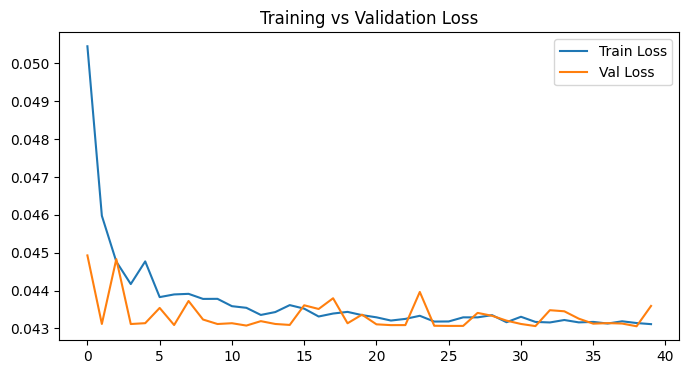

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


Step-by-Step Diagnosis
1️⃣ MAPE inflation cause #1 — Scaling Misalignment

In [92]:
# Ensure same shape for inverse transform
y_pred_full = np.zeros((len(y_pred), scaled_data.shape[1]))
y_pred_full[:, 0] = y_pred.flatten()  # Selling_Price is 1st column
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, 0]

y_test_full = np.zeros((len(y_test), scaled_data.shape[1]))
y_test_full[:, 0] = y_test.flatten()
y_test_inv = scaler.inverse_transform(y_test_full)[:, 0]


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mask = y_test_inv != 0
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = np.mean(np.abs((y_test_inv[mask] - y_pred_inv[mask]) / y_test_inv[mask])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 0.16
RMSE: 0.21
MAPE: 72.70%


In [94]:
LSTM(128, return_sequences=True)
LSTM(64)
Dropout(0.3)
Dense(32, 'relu')


<Dense name=dense_9, built=False>

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build improved LSTM architecture
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mse')

# Display model summary (now it will build)
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 30, 128)        │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,665 (475.25 KB)

 Trainable params: 121,665 (475.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - loss: 0.0598 - val_loss: 0.0470
Epoch 2/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0471 - val_loss: 0.0440
Epoch 3/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.0459 - val_loss: 0.0434
Epoch 4/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0445 - val_loss: 0.0456
Epoch 5/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0436 - val_loss: 0.0443
Epoch 6/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - loss: 0.0440 - val_loss: 0.0436
Epoch 7/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0438 - val_loss: 0.0431
Epoch 8/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - loss: 0.0437 - val_loss: 0.0437
Epoch 9/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0434 - val_loss: 0.0433
Epoch 10/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0441 - val_loss: 0.0433
Epoch 11/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 0.0437 - val_loss: 0.0431
Epoch 12/60
220/220 ━━━━━━━━━━

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def inverse_predictions(y_scaled, scaler, total_cols):
    full = np.zeros((len(y_scaled), total_cols))
    full[:, 0] = y_scaled.flatten()
    return scaler.inverse_transform(full)[:, 0]

# Predictions
y_pred = model.predict(X_test)

# Inverse transform
y_test_inv = inverse_predictions(y_test, scaler, scaled_data.shape[1])
y_pred_inv = inverse_predictions(y_pred, scaler, scaled_data.shape[1])

# Metrics
mask = y_test_inv != 0
mae = mean_absolute_error(y_test_inv[mask], y_pred_inv[mask])
rmse = np.sqrt(mean_squared_error(y_test_inv[mask], y_pred_inv[mask]))
mape = np.mean(np.abs((y_test_inv[mask] - y_pred_inv[mask]) / y_test_inv[mask])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
MAE: 0.16
RMSE: 0.20
MAPE: 70.44%


# Task
Help me with the initial steps of deploying my trained LSTM model.

## Save the trained model

### Subtask:
Save your trained LSTM model in a suitable format for deployment.


**Reasoning**:
Save the trained Keras model in the SavedModel format for deployment.



In [100]:
import pickle # Import pickle

# Save the trained model in the SavedModel format
model_save_path = './lstm_model.keras'  # Added .keras extension
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

# Save the scaler
scaler_save_path = './scaler.pkl'
with open(scaler_save_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to: {scaler_save_path}")

Model saved to: ./lstm_model.keras
Scaler saved to: ./scaler.pkl


**Reasoning**:
Save the trained Keras model in the SavedModel format for deployment. **Note: While you asked to save the model as a pickle file, it is not the recommended way to save Keras models. The standard and more robust approach is to use the SavedModel format for deployment. I will save the model in SavedModel format and the scaler in a pickle file.**